### Linear Regression Task
- 각 광고 종목에 투자했을 때, 수익이 얼만큼 발생하는지 회귀 예측 진행

In [1]:
import pandas as pd

ad_df = pd.read_csv('./datasets/advertising.csv')
ad_df




,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


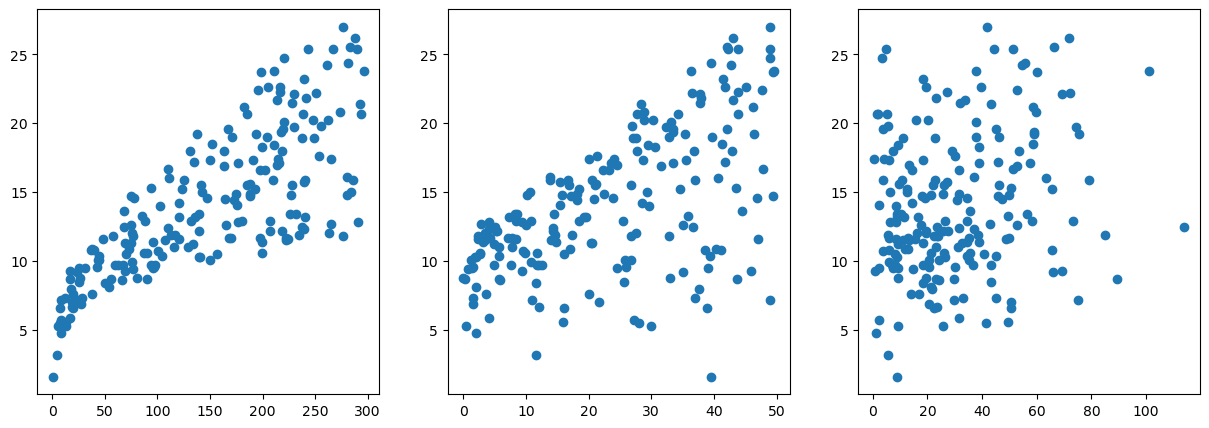

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(ad_df['TV'], ad_df['Sales'])

axes[1].scatter(ad_df['Radio'], ad_df['Sales'])

axes[2].scatter(ad_df['Newspaper'], ad_df['Sales'])

In [71]:
ad = ad_df[['TV', 'Sales']]
bd= ad_df[['Radio', 'Sales']]
cd= ad_df[['Newspaper', 'Sales']]
cd

,Newspaper,Sales
0,69.2,22.1
1,45.1,10.4
2,69.3,9.3
3,58.5,18.5
4,58.4,12.9
...,...,...
195,13.8,7.6
196,8.1,9.7
197,6.4,12.8
198,66.2,25.5


In [49]:
from sklearn.model_selection import train_test_split
import torch
from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(124)

features, targets = ad.iloc[:, :-1], ad.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

W = torch.zeros(1, requires_grad=True)
# 편향 초기화
b = torch.zeros(1, requires_grad=True)

# 경사하강법
# optimizer = SGD([W,b], lr= 1e-5)

optimizer = SGD([W,b], lr= 0.00003)

# 반복 횟수
epochs = 1000000

for epoch in range(1, epochs+1):
    # 가설 선언
    H = W * X_train +b
    # loss function
    loss = torch.mean((y_train - H) ** 2)
    # 다음 기울기를 위해 기존 기울기를 최기화
    optimizer.zero_grad()
    # 손실함수 미분 후 기울기 계산
    loss.backward()
    # W, b 업데이트
    optimizer.step()

    if epoch % 100000 == 0:
        print('{:4d}/{}: W : {:.4f}, b: {:.4f} loss: {:.4f}'.format(epoch, epochs, W.item(), b.item(), loss.item()))


100000/1000000: W : 0.0547, b: 5.6243 loss: 11.3684
200000/1000000: W : 0.0485, b: 6.8562 loss: 10.8232
300000/1000000: W : 0.0471, b: 7.1262 loss: 10.7971
400000/1000000: W : 0.0468, b: 7.1863 loss: 10.7958
500000/1000000: W : 0.0468, b: 7.1863 loss: 10.7958
600000/1000000: W : 0.0468, b: 7.1863 loss: 10.7958


KeyboardInterrupt: 

In [45]:
import numpy as np

H = 0.0485 * X_test + 6.8562 
# RMSE
print(np.sqrt(mse_loss(H, y_test).item()))

3.0512894953164498


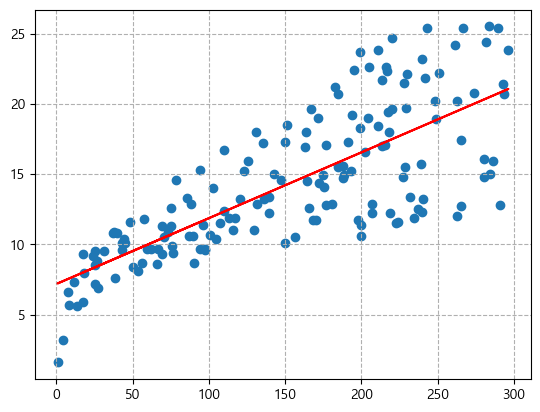

In [50]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(X_train, y_train)
plt.plot(X_train, 0.0468 * X_train + 7.1863 , color="red")
plt.grid(visible=True, linestyle='--')
plt.show()

In [52]:
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(124)

features, targets = ad.iloc[:, :-1], ad.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

# 선형 회기 모델
# Linear(input dimension, out dimension)
l_r = Linear(1, 1)
# Linear 객체는 초기화한 W와 b를 가지고 있는 이를 parameters()로 가져온다.
optimizer = SGD([W,b], lr= 0.000033)

epochs = 100000

for epoch in range(1, epochs+1):
    # 가설 선언
    H = W * X_train +b
    # loss function
    loss = torch.mean((y_train - H) ** 2)
    # 다음 기울기를 위해 기존 기울기를 최기화
    optimizer.zero_grad()
    # 손실함수 미분 후 기울기 계산
    loss.backward()
    # W, b 업데이트
    optimizer.step()

    if epoch % 100000 == 0:
        print('{:4d}/{}: W : {:.4f}, b: {:.4f} loss: {:.4f}'.format(epoch, epochs, W.item(), b.item(), loss.item()))


100000/100000: W : 0.0468, b: 7.1863 loss: 10.7958


In [53]:
from torch.nn import Module, Linear

class LinearRegressionModel(Module):
    def __init__(self):
        super().__init__()
        self.linear = Linear(1,1)
    # model (X_train)
    def forward(self, x):
        return self.linear(x)

In [67]:
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(124)

features, targets = ad.iloc[:, :-1], ad.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_splitbfeatures, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

# 선형 회기 모델
# Linear(input dimension, out dimension)
l_r = LinearRegressionModel()
# Linear 객체는 초기화한 W와 b를 가지고 있는 이를 parameters()로 가져온다.
optimizer = SGD(l_r.parameters(), lr= 1e-5)


epochs = 200000

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(H, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10000 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W, b, loss.item()))


100000/100000: W : 0.0468, b: 7.1863 loss: 10.7958


In [55]:
import numpy as np

H = 0.0485 * X_test + 6.8562 
# RMSE
print(np.sqrt(mse_loss(H, y_test).item()))

3.0512894953164498


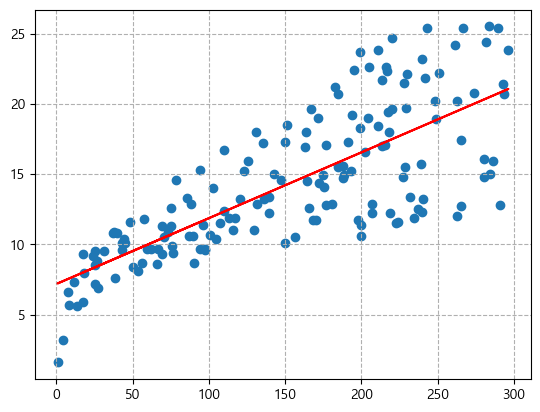

In [56]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.scatter(X_train, y_train)
plt.plot(X_train, 0.0468 * X_train + 7.1863 , color="red")
plt.grid(visible=True, linestyle='--')
plt.show()

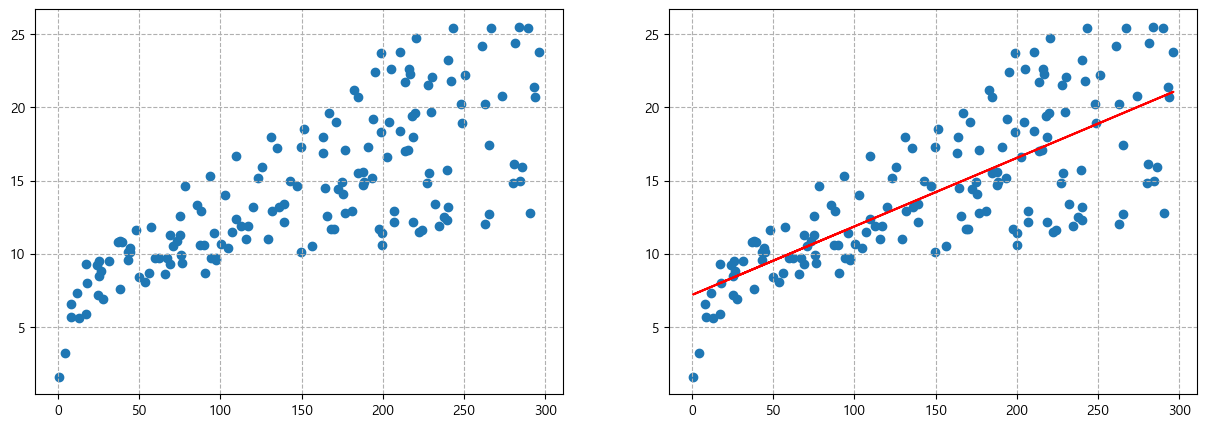

In [61]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False



fig, axes = plt.subplots(1, 2, figsize=(15, 5))


axes[0].scatter(X_train, y_train)
# axes[0].plot(X_train, 0.0468 * X_train + 7.1863 , color="red")
axes[0].grid(visible=True, linestyle='--')


axes[1].scatter(X_train, y_train)
axes[1].plot(X_train, 0.0468 * X_train + 7.1863 , color="red")
axes[1].grid(visible=True, linestyle='--')
plt.show()

In [77]:
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(124)

bfeatures, btargets = bd.iloc[:, :-1], bd.iloc[:, -1]

bX_train, bX_test, by_train, by_test = \
train_test_split(bfeatures, btargets, test_size=0.2, random_state=124)

bX_train = torch.FloatTensor(bX_train.values)
by_train = torch.FloatTensor(by_train.values).view(-1, 1)

bX_test = torch.FloatTensor(bX_test.values)
by_test = torch.FloatTensor(by_test.values).view(-1, 1)

# 선형 회기 모델
# Linear(input dimension, out dimension)
l_r = LinearRegressionModel()
# Linear 객체는 초기화한 W와 b를 가지고 있는 이를 parameters()로 가져온다.
optimizer = SGD(l_r.parameters(), lr= 1e-5)


epochs = 200000

for epoch in range(1, epochs + 1):
    H = l_r(bX_train)
    loss = mse_loss(H, by_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10000 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W, b, loss.item()))


10000/200000: W: 0.4743, b: 0.7922, loss: 37.1882
20000/200000: W: 0.4599, b: 1.2589, loss: 35.0073
30000/200000: W: 0.4463, b: 1.7003, loss: 33.0567
40000/200000: W: 0.4335, b: 2.1178, loss: 31.3120
50000/200000: W: 0.4213, b: 2.5126, loss: 29.7515
60000/200000: W: 0.4098, b: 2.8859, loss: 28.3557
70000/200000: W: 0.3990, b: 3.2391, loss: 27.1073
80000/200000: W: 0.3887, b: 3.5730, loss: 25.9906
90000/200000: W: 0.3790, b: 3.8888, loss: 24.9919
100000/200000: W: 0.3698, b: 4.1875, loss: 24.0986
110000/200000: W: 0.3611, b: 4.4701, loss: 23.2993
120000/200000: W: 0.3528, b: 4.7374, loss: 22.5845
130000/200000: W: 0.3451, b: 4.9900, loss: 21.9454
140000/200000: W: 0.3377, b: 5.2288, loss: 21.3740
150000/200000: W: 0.3308, b: 5.4548, loss: 20.8627
160000/200000: W: 0.3242, b: 5.6687, loss: 20.4050
170000/200000: W: 0.3180, b: 5.8707, loss: 19.9962
180000/200000: W: 0.3121, b: 6.0618, loss: 19.6304
190000/200000: W: 0.3065, b: 6.2426, loss: 19.3031
200000/200000: W: 0.3012, b: 6.4136, los

In [76]:
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD

torch.manual_seed(124)

cfeatures, ctargets = cd.iloc[:, :-1], cd.iloc[:, -1]

cX_train, cX_test, cy_train, cy_test = \
train_test_split(cfeatures, ctargets, test_size=0.2, random_state=124)

cX_train = torch.FloatTensor(cX_train.values)
cy_train = torch.FloatTensor(cy_train.values).view(-1, 1)

cX_test = torch.FloatTensor(cX_test.values)
cy_test = torch.FloatTensor(cy_test.values).view(-1, 1)

# 선형 회기 모델
# Linear(input dimension, out dimension)
l_r = LinearRegressionModel()
# Linear 객체는 초기화한 W와 b를 가지고 있는 이를 parameters()로 가져온다.
optimizer = SGD(l_r.parameters(), lr= 1e-5)


epochs = 200000

for epoch in range(1, epochs + 1):
    H = l_r(cX_train)
    loss = mse_loss(H, cy_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10000 == 0:
        W = list(l_r.parameters())[0].item()
        b = list(l_r.parameters())[1].item()
        print('{:4d}/{}: W: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W, b, loss.item()))


10000/200000: W: 0.3221, b: 1.0269, loss: 63.8448
20000/200000: W: 0.3064, b: 1.7220, loss: 59.0087
30000/200000: W: 0.2917, b: 2.3738, loss: 54.7560
40000/200000: W: 0.2779, b: 2.9851, loss: 51.0162
50000/200000: W: 0.2650, b: 3.5583, loss: 47.7275
60000/200000: W: 0.2529, b: 4.0958, loss: 44.8359
70000/200000: W: 0.2415, b: 4.5999, loss: 42.2925
80000/200000: W: 0.2308, b: 5.0726, loss: 40.0564
90000/200000: W: 0.2208, b: 5.5159, loss: 38.0897
100000/200000: W: 0.2114, b: 5.9316, loss: 36.3600
110000/200000: W: 0.2026, b: 6.3213, loss: 34.8394
120000/200000: W: 0.1944, b: 6.6869, loss: 33.5020
130000/200000: W: 0.1866, b: 7.0297, loss: 32.3258
140000/200000: W: 0.1794, b: 7.3511, loss: 31.2917
150000/200000: W: 0.1726, b: 7.6526, loss: 30.3823
160000/200000: W: 0.1662, b: 7.9353, loss: 29.5824
170000/200000: W: 0.1602, b: 8.2002, loss: 28.8795
180000/200000: W: 0.1546, b: 8.4489, loss: 28.2608
190000/200000: W: 0.1494, b: 8.6822, loss: 27.7166
200000/200000: W: 0.1444, b: 8.9005, los

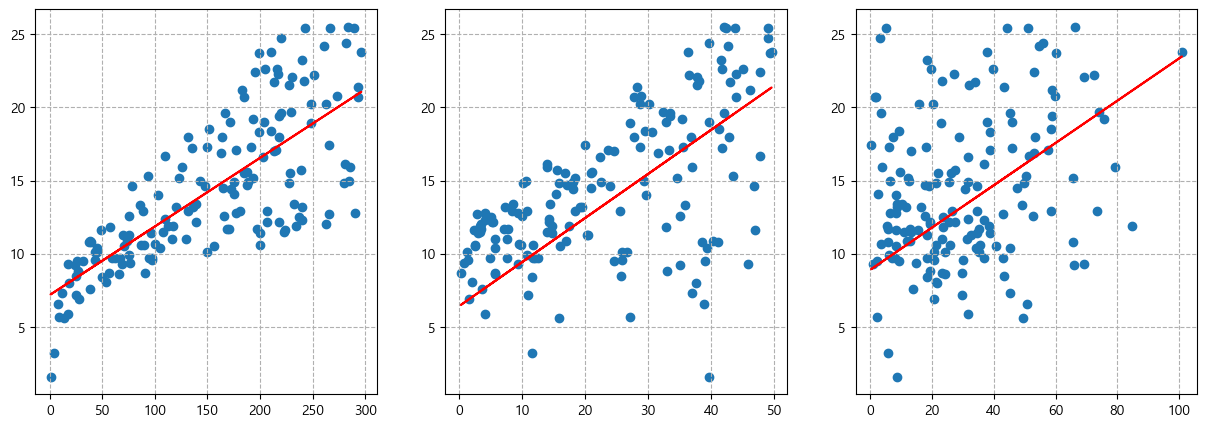

In [78]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False



fig, axes = plt.subplots(1, 3, figsize=(15, 5))


axes[0].scatter(X_train, y_train)
axes[0].plot(X_train, 0.0468 * X_train + 7.1863 , color="red")
axes[0].grid(visible=True, linestyle='--')


axes[1].scatter(bX_train, by_train)
axes[1].plot(bX_train, 0.3012 * bX_train + 6.4136 , color="red")
axes[1].grid(visible=True, linestyle='--')

axes[2].scatter(cX_train, cy_train)
axes[2].plot(cX_train, 0.1444 * cX_train + 8.9005 , color="red")
axes[2].grid(visible=True, linestyle='--')
plt.show()

### sklearn - Linear Regression Task

In [79]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



features, targets = ad.iloc[:,:-1], ad.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(x_train, y_train)

print('w: {:.4f}, b: {:.4f}'.format(l_r.coef_[0], l_r.intercept_))


w: 0.0467, b: 7.2020


In [81]:
from sklearn.metrics import mean_squared_error

precision = l_r.predict(x_test)
print('MSE loss : {:.4f}, RMSE loss : {:.4f}'.format(mean_squared_error(y_test, precision), np.sqrt(mean_squared_error(y_test, precision))))



# mean_squared_error(y_test, precision)

MSE loss : 9.4174, RMSE loss : 3.0688


9.417371887312393